In [6]:
from typing import Callable

import numpy as np
import matplotlib.pyplot as plt

In [7]:
def f(x: float) -> float:
    return x**2 - 10*np.power(np.sin(x), 15)

def df(x: float) -> float:
    return 2 * (x - 75*np.power(np.sin(x), 14)*np.cos(x))

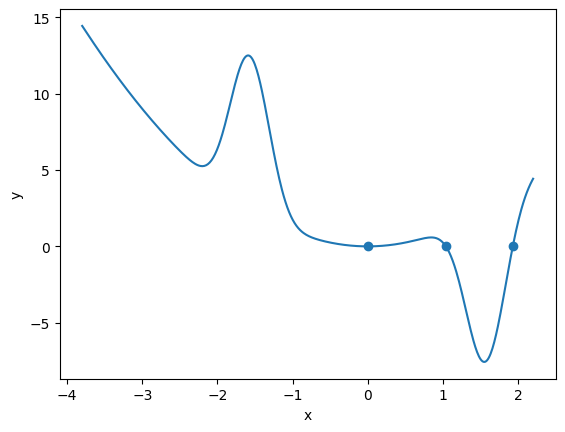

In [8]:
START = -3.8
STOP = 2.2

x = np.linspace(START, STOP, 500)
y = f(x)
plt.plot(x, y)
plt.scatter([0, 1.03947, 1.92974], [0, 0, 0])
plt.xlabel("x")
plt.ylabel("y")
plt.show()

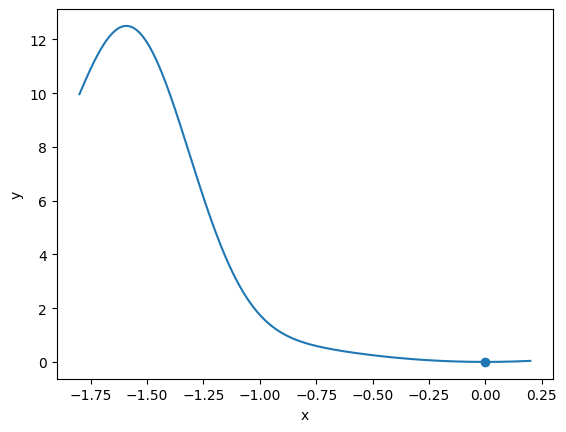

In [9]:
START = -1.8
STOP = 0.2

x = np.linspace(START, STOP, 500)
y = f(x)
plt.plot(x, y)
plt.scatter([0], [0])
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [10]:
# metoda siecznych
def secant_method(
    f: Callable[[float], float],
    x0: float,
    x1: float,
    eps: float,
    eps_comp: Callable[[float, float, Callable], float],
    max_iter: float = float("inf")
) -> tuple[float | None, int]:
    i = 1
    while i < max_iter:
        x2 = x1 - (f(x1) * (x1 - x0)) / (f(x1) - f(x0))

        if eps_comp(x2, x1, f) < eps:
            return x2, i

        x0 = x1
        x1 = x2
        i += 1

    return None, i

In [11]:
# metoda Newtona
def newton_method(
    f: Callable[[float], float],
    df: Callable[[float], float],
    x0: float,
    eps: float,
    eps_comp: Callable[[float, float, Callable], float],
    max_iter: float = float("inf")
) -> tuple[float | None, int]:
    i = 1
    while i < max_iter:
        df_val = df(x0)
        if df_val == 0:
            return None, None
        x1 = x0 - (f(x0) / df_val)
        if eps_comp(x1, x0, f) < eps:
            return x1, i

        x0 = x1
        i += 1

    return None, i

In [12]:
def comp_x(x1: float, x0: float, _: Callable) -> float:
    return abs(x1 - x0)


def comp_fx(xi: float, _: float, f: Callable) -> float:
    return abs(f(xi))

In [39]:
X0_newton = np.linspace(STOP, START, 21)
EPS = [10**-i for i in range(1, 11)]
# wiersze - x0, kolumny - epsilon
newton_x_iterations = [[x] for x in X0_newton]
newton_x_results = [[x] for x in X0_newton]
newton_fx_iterations = [[x] for x in X0_newton]
newton_fx_results = [[x] for x in X0_newton]

header = [r"x0\eps", *EPS]

for i,x0 in enumerate(X0_newton):
    for eps in EPS:
        result_x, no_iterations_x = newton_method(f, df, x0, eps, comp_x)
        newton_x_iterations[i].append(no_iterations_x)
        newton_x_results[i].append(abs(result_x) if result_x else result_x)

        result_fx, no_iterations_fx = newton_method(f, df, x0, eps, comp_fx)
        newton_fx_iterations[i].append(no_iterations_fx)
        newton_fx_results[i].append(abs(result_fx) if result_fx else result_fx)

newton_x_iterations.insert(0, header)
newton_fx_iterations.insert(0, header)
newton_x_results.insert(0, header)
newton_fx_results.insert(0, header)


In [57]:
def print_table(table, sep=",", e=False):
    for item in table[0]:
        if isinstance(item, str):
            print(item, end=sep)
        else:
            print(f"{item:.1e}", end=sep)

    print()

    for row in table[-1:0:-1]:
        for i,item in enumerate(row):
            if item is None:
                print("-", end=sep)
            elif isinstance(item, int) or isinstance(item, str):
                print(item, end=sep)
            elif isinstance(item, tuple):
                print(f"{item[0]:.1f}{sep}{item[1]:.1f}", end=sep)
            else:
                if e and i == 0:
                    print(f"{abs(item):.1f}", end=sep)
                else:
                    print(f"{abs(item):.1e}", end=sep)
        print()

In [44]:
# print_table(newton_x_iterations)

for row in newton_fx_results[1:]:
    for i,item in enumerate(row[1:], 1):
        # print(item, 10**(-i))
        if item and not (item > 10**(-i)):
            print(row[0], i, item)

0.2 1 0.09999999525687824
0.1 1 0.04999999999968424
-0.10000000000000003 1 0.05000000000031577


In [13]:
print_table(newton_fx_iterations)

x0\eps,1.0e-01,1.0e-02,1.0e-03,1.0e-04,1.0e-05,1.0e-06,1.0e-07,1.0e-08,1.0e-09,1.0e-10,
-1.8,3,5,6,8,10,11,13,15,16,18,
-1.7,6,8,10,11,13,15,16,18,20,21,
-1.6,6,8,10,11,13,15,16,18,20,21,
-1.5,2,4,6,7,9,11,12,14,16,17,
-1.4,4,6,7,9,11,12,14,16,17,19,
-1.3,4,6,8,9,11,13,14,16,18,19,
-1.2,4,6,8,9,11,13,14,16,17,19,
-1.1,4,5,7,9,10,12,14,15,17,19,
-1.0,3,5,7,8,10,12,13,15,17,18,
-0.9,3,4,6,8,9,11,13,14,16,18,
-0.8,2,4,6,7,9,11,12,14,16,17,
-0.7,2,3,5,7,8,10,12,13,15,17,
-0.6,1,3,5,6,8,10,11,13,15,16,
-0.5,1,3,4,6,8,9,11,13,14,16,
-0.4,1,3,4,6,7,9,11,12,14,16,
-0.3,1,2,4,5,7,9,10,12,14,15,
-0.2,1,2,3,5,6,8,10,11,13,15,
-0.1,1,1,2,4,5,7,9,10,12,14,
0.0,-,-,-,-,-,-,-,-,-,-,
0.1,1,1,2,4,5,7,9,10,12,14,
0.2,1,1,3,5,6,8,10,11,13,15,


In [41]:
print_table(newton_x_results, e=True)

x0\eps,1.0e-01,1.0e-02,1.0e-03,1.0e-04,1.0e-05,1.0e-06,1.0e-07,1.0e-08,1.0e-09,1.0e-10,
-1.8,5.9e-02,7.4e-03,9.2e-04,5.8e-05,7.2e-06,9.0e-07,5.6e-08,7.0e-09,8.8e-10,5.5e-11,
-1.7,7.2e-02,9.0e-03,5.6e-04,7.0e-05,8.8e-06,5.5e-07,6.8e-08,8.5e-09,5.3e-10,6.7e-11,
-1.6,7.5e-02,9.4e-03,5.8e-04,7.3e-05,9.1e-06,5.7e-07,7.1e-08,8.9e-09,5.6e-10,7.0e-11,
-1.5,7.8e-02,9.7e-03,6.1e-04,7.6e-05,9.5e-06,5.9e-07,7.4e-08,9.3e-09,5.8e-10,7.2e-11,
-1.4,6.3e-02,7.9e-03,9.8e-04,6.1e-05,7.7e-06,9.6e-07,6.0e-08,7.5e-09,9.4e-10,5.9e-11,
-1.3,7.4e-02,9.2e-03,5.7e-04,7.2e-05,9.0e-06,5.6e-07,7.0e-08,8.8e-09,5.5e-10,6.8e-11,
-1.2,6.4e-02,8.1e-03,5.0e-04,6.3e-05,7.9e-06,9.8e-07,6.1e-08,7.7e-09,9.6e-10,6.0e-11,
-1.1,9.7e-02,6.1e-03,7.6e-04,9.5e-05,5.9e-06,7.4e-07,9.3e-08,5.8e-09,7.2e-10,9.0e-11,
-1.0,6.9e-02,8.6e-03,5.4e-04,6.7e-05,8.4e-06,5.2e-07,6.5e-08,8.2e-09,5.1e-10,6.4e-11,
-0.9,9.3e-02,5.8e-03,7.3e-04,9.1e-05,5.7e-06,7.1e-07,8.9e-08,5.6e-09,6.9e-10,8.7e-11,
-0.8,6.6e-02,8.3e-03,5.2e-04,6.5e-05,8.1e-06,5.1e-07

In [42]:
print_table(newton_fx_results, e=True)

x0\eps,1.0e-01,1.0e-02,1.0e-03,1.0e-04,1.0e-05,1.0e-06,1.0e-07,1.0e-08,1.0e-09,1.0e-10,
-1.8,2.4e-01,5.9e-02,2.9e-02,7.4e-03,1.8e-03,9.2e-04,2.3e-04,5.8e-05,2.9e-05,7.2e-06,
-1.7,2.9e-01,7.2e-02,1.8e-02,9.0e-03,2.2e-03,5.6e-04,2.8e-04,7.0e-05,1.8e-05,8.8e-06,
-1.6,3.0e-01,7.5e-02,1.9e-02,9.4e-03,2.3e-03,5.8e-04,2.9e-04,7.3e-05,1.8e-05,9.1e-06,
-1.5,3.1e-01,7.8e-02,1.9e-02,9.7e-03,2.4e-03,6.1e-04,3.0e-04,7.6e-05,1.9e-05,9.5e-06,
-1.4,2.5e-01,6.3e-02,3.1e-02,7.9e-03,2.0e-03,9.8e-04,2.5e-04,6.1e-05,3.1e-05,7.7e-06,
-1.3,2.9e-01,7.4e-02,1.8e-02,9.2e-03,2.3e-03,5.7e-04,2.9e-04,7.2e-05,1.8e-05,9.0e-06,
-1.2,2.6e-01,6.4e-02,1.6e-02,8.1e-03,2.0e-03,5.0e-04,2.5e-04,6.3e-05,3.1e-05,7.9e-06,
-1.1,1.9e-01,9.7e-02,2.4e-02,6.1e-03,3.0e-03,7.6e-04,1.9e-04,9.5e-05,2.4e-05,5.9e-06,
-1.0,2.7e-01,6.9e-02,1.7e-02,8.6e-03,2.1e-03,5.4e-04,2.7e-04,6.7e-05,1.7e-05,8.4e-06,
-0.9,1.9e-01,9.3e-02,2.3e-02,5.8e-03,2.9e-03,7.3e-04,1.8e-04,9.1e-05,2.3e-05,5.7e-06,
-0.8,2.7e-01,6.6e-02,1.7e-02,8.3e-03,2.1e-03,5.2e-04

In [33]:
# newton_method(f, df, -1.0, 10**-10, comp_x)
newton_method(f, df, -1.0, 10**-10, comp_fx)

(-8.369377548230593e-06, 18)

In [52]:
X1_secant = np.linspace(STOP, START, 21)[-2:0:-1]
X0_secant = X1_secant[::-1]
EPS = [10**-i for i in range(1, 11)]

x0_ = -1.8
x1_ = 0.2
secant_x_iterations = [[(x0_, x)] for x in X1_secant]
secant_x_results = [[(x0_, x)] for x in X1_secant]
secant_fx_iterations = [[(x0_, x)] for x in X1_secant]
secant_fx_results = [[(x0_, x)] for x in X1_secant]
# wiersze - x0, kolumny - epsilon
for i, x1 in enumerate(X1_secant):
    for eps in EPS:
        result_x, no_iterations_x = secant_method(f, x0_, x1, eps, comp_x)
        secant_x_iterations[i].append(no_iterations_x)
        secant_x_results[i].append(result_x)

        result_fx, no_iterations_fx = secant_method(f, x0_, x1, eps, comp_fx)
        secant_fx_iterations[i].append(no_iterations_fx)
        secant_fx_results[i].append(result_fx)

n = len(secant_x_iterations)

secant_x_iterations += [[(x, x1_)] for x in X0_secant]
secant_x_results += [[(x, x1_)] for x in X0_secant]
secant_fx_iterations += [[(x, x1_)] for x in X0_secant]
secant_fx_results += [[(x, x1_)] for x in X0_secant]

for i,x0 in enumerate(X0_secant, n):
    for eps in EPS:
        result_x, no_iterations_x = secant_method(f, x0, x1_, eps, comp_x)
        secant_x_iterations[i].append(no_iterations_x)
        secant_x_results[i].append(abs(result_x) if result_x else result_x)

        result_fx, no_iterations_fx = secant_method(f, x0, x1_, eps, comp_fx)
        secant_fx_iterations[i].append(no_iterations_fx)
        secant_fx_results[i].append(abs(result_fx) if result_fx else result_fx)


secant_x_iterations.append([(-1.8, 0.2)])
secant_x_results.append([(-1.8, 0.2)])
secant_fx_iterations.append([(-1.8, 0.2)])
secant_fx_results.append([(-1.8, 0.2)])


for eps in EPS:
    result_x, no_iterations_x = secant_method(f, -1.8, 0.2, eps, comp_x)
    secant_x_iterations[-1].append(no_iterations_x)
    secant_x_results[-1].append(abs(result_x) if result_x else result_x)

    result_fx, no_iterations_fx = secant_method(f, -1.8, 0.2, eps, comp_fx)
    secant_fx_iterations[-1].append(no_iterations_fx)
    secant_fx_results[-1].append(abs(result_fx) if result_fx else result_fx)


secant_x_iterations.insert(0, header)
secant_fx_iterations.insert(0, header)
secant_x_results.insert(0, header)
secant_fx_results.insert(0, header)

In [53]:
print_table(secant_x_iterations)

x0\eps,1.0e-01,1.0e-02,1.0e-03,1.0e-04,1.0e-05,1.0e-06,1.0e-07,1.0e-08,1.0e-09,1.0e-10,
-1.8,0.2,1,1,11,16,21,26,30,35,40,45,
-1.7,0.2,1,1,11,16,21,26,30,35,40,45,
-1.6,0.2,1,1,11,16,21,26,30,35,40,45,
-1.5,0.2,1,1,11,16,21,26,30,35,40,45,
-1.4,0.2,1,1,11,16,21,26,30,35,40,45,
-1.3,0.2,1,1,11,16,21,26,30,35,40,45,
-1.2,0.2,1,6,11,16,21,26,30,35,40,45,
-1.1,0.2,1,7,11,16,21,26,30,35,40,45,
-1.0,0.2,1,7,11,16,21,26,30,35,40,45,
-0.9,0.2,1,7,11,16,21,26,31,35,40,45,
-0.8,0.2,1,7,12,16,21,26,31,35,40,45,
-0.7,0.2,1,7,12,16,21,26,31,36,40,45,
-0.6,0.2,1,7,12,16,21,26,31,36,40,45,
-0.5,0.2,3,7,12,17,21,26,31,36,40,45,
-0.4,0.2,3,7,12,17,22,26,31,36,41,45,
-0.3,0.2,3,7,12,17,22,27,31,36,41,46,
-0.2,0.2,3,3,3,3,3,3,3,3,42,47,
-0.1,0.2,4,4,4,4,4,4,4,4,43,48,
0.0,0.2,2,2,2,2,2,2,2,2,2,2,
0.1,0.2,2,5,10,14,19,24,29,33,38,43,
-1.8,0.1,1,1,10,15,19,24,29,34,38,43,
-1.8,0.0,1,1,1,1,1,1,1,1,1,1,
-1.8,-0.1,1,1,10,15,19,24,29,34,38,43,
-1.8,-0.2,1,1,11,16,21,25,30,35,40,45,
-1.8,-0.3,1,7,12,17,22,26,31

In [54]:
print_table(secant_fx_iterations)

x0\eps,1.0e-01,1.0e-02,1.0e-03,1.0e-04,1.0e-05,1.0e-06,1.0e-07,1.0e-08,1.0e-09,1.0e-10,
-1.8,0.2,1,3,5,7,10,12,15,17,19,22,
-1.7,0.2,1,3,5,7,10,12,15,17,19,22,
-1.6,0.2,1,3,5,7,10,12,15,17,19,22,
-1.5,0.2,1,3,5,7,10,12,15,17,19,22,
-1.4,0.2,1,3,5,7,10,12,15,17,19,22,
-1.3,0.2,1,3,5,7,10,12,15,17,19,22,
-1.2,0.2,1,3,5,7,10,12,15,17,19,22,
-1.1,0.2,1,3,5,8,10,12,15,17,19,22,
-1.0,0.2,1,3,5,8,10,12,15,17,20,22,
-0.9,0.2,1,3,5,8,10,12,15,17,20,22,
-0.8,0.2,1,3,5,8,10,13,15,17,20,22,
-0.7,0.2,1,3,5,8,10,13,15,17,20,22,
-0.6,0.2,1,3,5,8,10,13,15,17,20,22,
-0.5,0.2,2,3,6,8,10,13,15,18,20,22,
-0.4,0.2,2,3,6,8,11,13,15,18,20,23,
-0.3,0.2,2,4,6,8,11,13,16,18,20,23,
-0.2,0.2,2,4,7,9,12,14,17,19,21,24,
-0.1,0.2,1,6,8,10,13,15,18,20,22,25,
0.0,0.2,1,1,1,1,1,1,1,1,1,1,
0.1,0.2,1,1,3,6,8,11,13,15,18,20,
-1.8,0.1,1,2,4,6,8,11,13,16,18,20,
-1.8,0.0,1,1,1,1,1,1,1,1,1,1,
-1.8,-0.1,1,1,4,6,8,11,13,16,18,20,
-1.8,-0.2,1,2,5,7,10,12,15,17,19,22,
-1.8,-0.3,1,3,6,8,11,13,15,18,20,23,
-1.8,-0.4,2,4,6,9,11,14,1

In [59]:
print_table(secant_fx_results, e=True)


x0\eps,1.0e-01,1.0e-02,1.0e-03,1.0e-04,1.0e-05,1.0e-06,1.0e-07,1.0e-08,1.0e-09,1.0e-10,
-1.8,0.2,2.1e-01,6.8e-02,2.6e-02,9.8e-03,2.3e-03,8.8e-04,2.1e-04,7.9e-05,3.0e-05,7.2e-06,
-1.7,0.2,2.1e-01,6.8e-02,2.6e-02,9.7e-03,2.3e-03,8.8e-04,2.1e-04,7.9e-05,3.0e-05,7.1e-06,
-1.6,0.2,2.1e-01,6.8e-02,2.5e-02,9.7e-03,2.3e-03,8.7e-04,2.1e-04,7.9e-05,3.0e-05,7.1e-06,
-1.5,0.2,2.1e-01,6.8e-02,2.5e-02,9.7e-03,2.3e-03,8.7e-04,2.1e-04,7.9e-05,3.0e-05,7.1e-06,
-1.4,0.2,2.1e-01,6.8e-02,2.5e-02,9.7e-03,2.3e-03,8.8e-04,2.1e-04,7.9e-05,3.0e-05,7.1e-06,
-1.3,0.2,2.1e-01,6.8e-02,2.6e-02,9.8e-03,2.3e-03,8.8e-04,2.1e-04,7.9e-05,3.0e-05,7.2e-06,
-1.2,0.2,2.1e-01,6.9e-02,2.6e-02,9.9e-03,2.3e-03,8.9e-04,2.1e-04,8.0e-05,3.1e-05,7.2e-06,
-1.1,0.2,2.2e-01,7.0e-02,2.6e-02,6.2e-03,2.4e-03,9.0e-04,2.1e-04,8.1e-05,3.1e-05,7.3e-06,
-1.0,0.2,2.3e-01,7.3e-02,2.7e-02,6.4e-03,2.4e-03,9.3e-04,2.2e-04,8.4e-05,2.0e-05,7.6e-06,
-0.9,0.2,2.4e-01,7.6e-02,2.8e-02,6.6e-03,2.5e-03,9.6e-04,2.3e-04,8.7e-05,2.1e-05,7.8e-06,
-0.8,0.2,2.6

In [58]:
print_table(secant_x_results, e=True)

x0\eps,1.0e-01,1.0e-02,1.0e-03,1.0e-04,1.0e-05,1.0e-06,1.0e-07,1.0e-08,1.0e-09,1.0e-10,
-1.8,0.2,2.1e-01,2.1e-01,1.4e-03,1.3e-04,1.2e-05,1.0e-06,1.5e-07,1.4e-08,1.2e-09,1.1e-10,
-1.7,0.2,2.1e-01,2.1e-01,1.4e-03,1.3e-04,1.2e-05,1.0e-06,1.5e-07,1.4e-08,1.2e-09,1.1e-10,
-1.6,0.2,2.1e-01,2.1e-01,1.4e-03,1.3e-04,1.1e-05,1.0e-06,1.5e-07,1.4e-08,1.2e-09,1.1e-10,
-1.5,0.2,2.1e-01,2.1e-01,1.4e-03,1.3e-04,1.1e-05,1.0e-06,1.5e-07,1.4e-08,1.2e-09,1.1e-10,
-1.4,0.2,2.1e-01,2.1e-01,1.4e-03,1.3e-04,1.2e-05,1.0e-06,1.5e-07,1.4e-08,1.2e-09,1.1e-10,
-1.3,0.2,2.1e-01,2.1e-01,1.4e-03,1.3e-04,1.2e-05,1.0e-06,1.5e-07,1.4e-08,1.2e-09,1.1e-10,
-1.2,0.2,2.1e-01,1.6e-02,1.4e-03,1.3e-04,1.2e-05,1.1e-06,1.5e-07,1.4e-08,1.2e-09,1.1e-10,
-1.1,0.2,2.2e-01,1.0e-02,1.5e-03,1.3e-04,1.2e-05,1.1e-06,1.6e-07,1.4e-08,1.3e-09,1.1e-10,
-1.0,0.2,2.3e-01,1.0e-02,1.5e-03,1.4e-04,1.2e-05,1.1e-06,1.6e-07,1.4e-08,1.3e-09,1.2e-10,
-0.9,0.2,2.4e-01,1.1e-02,1.6e-03,1.4e-04,1.3e-05,1.1e-06,1.0e-07,1.5e-08,1.4e-09,1.2e-10,
-0.8,0.2,2.6

In [35]:
for row in secant_x_results[1:]:
    for i,item in enumerate(row[1:], 1):
        # print(item, 10**(-i))
        if item and item > 10**(-i):
            print(row[0], i, item)

(-1.8, -1.5000000000000002) 1 0.7306359408399958
(-1.8, -1.5000000000000002) 2 0.010913410449209
(-1.8, -1.5000000000000002) 3 0.0015920728826484495
(-1.8, -1.5000000000000002) 4 0.00014355678177406224
(-1.8, -1.5000000000000002) 5 1.294450718705502e-05
(-1.8, -1.5000000000000002) 6 1.1672054847384012e-06
(-1.8, -1.5000000000000002) 7 1.0524685290307361e-07
(-1.8, -1.5000000000000002) 8 1.5355308896966965e-08
(-1.8, -1.5000000000000002) 9 1.3845873394953125e-09
(-1.8, -1.5000000000000002) 10 1.248481625185265e-10
(-1.8, -1.3) 1 0.16592371022829652
(-1.8, -1.3) 2 0.16592371022829652
(-1.8, -1.3) 3 0.0011384336623781093
(-1.8, -1.3) 4 0.00010265143112181342
(-1.8, -1.3) 5 1.4976643192457923e-05
(-1.8, -1.3) 6 1.350443076651928e-06
(-1.8, -1.3) 7 1.2176937625678823e-07
(-1.8, -1.3) 8 1.0979937807484467e-08
(-1.8, -1.3) 9 1.6019513368127323e-09
(-1.8, -1.3) 10 1.4444786192979917e-10
(-1.8, 0.1) 1 0.10190955989024868
(-1.8, 0.1) 2 0.10190955989024868
(-1.8, 0.1) 3 0.0011367586396690017
(-1.

In [36]:
for row in secant_fx_results[1:]:
    for i,item in enumerate(row[1:], 1):
        # print(item, 10**(-i))
        if item and item > 10**(-i):
            print(row[0], i, item)

(-1.8, -1.5000000000000002) 1 0.28982586821843553
(-1.8, -1.5000000000000002) 2 0.07518375241615821
(-1.8, -1.5000000000000002) 3 0.028590180741923942
(-1.8, -1.5000000000000002) 4 0.006743828375898121
(-1.8, -1.5000000000000002) 5 0.0025760061088762358
(-1.8, -1.5000000000000002) 6 0.000983951954801698
(-1.8, -1.5000000000000002) 7 0.00023227976830214866
(-1.8, -1.5000000000000002) 8 8.872297279740258e-05
(-1.8, -1.5000000000000002) 9 2.0944652584486274e-05
(-1.8, -1.5000000000000002) 10 8.000145407497735e-06
(-1.8, -1.3) 1 0.16081457896775597
(-1.8, -1.3) 2 0.0816645994306354
(-1.8, -1.3) 3 0.02049627374515893
(-1.8, -1.3) 4 0.007806645357670338
(-1.8, -1.3) 5 0.002980638129244242
(-1.8, -1.3) 6 0.0007035806610060265
(-1.8, -1.3) 7 0.00026874480363818607
(-1.8, -1.3) 8 6.344208078502519e-05
(-1.8, -1.3) 9 2.4232717879399207e-05
(-1.8, -1.3) 10 9.256074553169652e-06
(-1.8, 0.1) 1 0.10190955989024868
(-1.8, 0.1) 2 0.05047287505599722
(-1.8, 0.1) 3 0.02022741017332047
(-1.8, 0.1) 4 0.00